In [1]:
from datetime import datetime
from storywrangling import Storywrangler
from storywrangling import Realtime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import six
from google.cloud import translate_v2 as translate

# initialize google translate client
# be sure to create a Google Cloud translation project and enable Cloud Translation:
# https://cloud.google.com/translate/docs/setup
translate_client = translate.Client()
available_langs = translate_client.get_languages()

# initialize storywrangler client
# You'll need access to the UVM network either through a VPN or port forwarding
storywrangler = Storywrangler()

In [2]:
# languages available from google translate
available_langs

[{'language': 'af', 'name': 'Afrikaans'},
 {'language': 'ak', 'name': 'Akan'},
 {'language': 'sq', 'name': 'Albanian'},
 {'language': 'am', 'name': 'Amharic'},
 {'language': 'ar', 'name': 'Arabic'},
 {'language': 'hy', 'name': 'Armenian'},
 {'language': 'as', 'name': 'Assamese'},
 {'language': 'ay', 'name': 'Aymara'},
 {'language': 'az', 'name': 'Azerbaijani'},
 {'language': 'bm', 'name': 'Bambara'},
 {'language': 'eu', 'name': 'Basque'},
 {'language': 'be', 'name': 'Belarusian'},
 {'language': 'bn', 'name': 'Bengali'},
 {'language': 'bho', 'name': 'Bhojpuri'},
 {'language': 'bs', 'name': 'Bosnian'},
 {'language': 'bg', 'name': 'Bulgarian'},
 {'language': 'ca', 'name': 'Catalan'},
 {'language': 'ceb', 'name': 'Cebuano'},
 {'language': 'ny', 'name': 'Chichewa'},
 {'language': 'zh', 'name': 'Chinese (Simplified)'},
 {'language': 'zh-TW', 'name': 'Chinese (Traditional)'},
 {'language': 'co', 'name': 'Corsican'},
 {'language': 'hr', 'name': 'Croatian'},
 {'language': 'cs', 'name': 'Czech'}

# Select langauges to investigate



First let's make a list of languages to translate our term of interest into.

In [3]:
langs = ['en',
         'es',
         'pt',
         'ar',
         'ko',
         'tr',
         'fr',
         'id',
         'uk',
         'it',
         'de',
         'ru',
         'fa',
         'pl',
         'tl',
         'nl',
         'ur',
         'ms',
         'ca',
         'el',
        ]


print("Including:")
print()

lang_dict = {}
index = 0
for lang in langs:
    for available in available_langs:
        if lang == available['language']:
            index += 1
            print(f"{lang}: ",available['name'])
            lang_dict[lang] = available['name']

            
print(f"\n{len(langs)} languages selected.")
assert len(langs) == index, print("Some language codes don't match")

Including:

en:  English
es:  Spanish
pt:  Portuguese
ar:  Arabic
ko:  Korean
tr:  Turkish
fr:  French
id:  Indonesian
uk:  Ukrainian
it:  Italian
de:  German
ru:  Russian
fa:  Persian
pl:  Polish
tl:  Filipino
nl:  Dutch
ur:  Urdu
ms:  Malay
ca:  Catalan
el:  Greek

20 languages selected.


In [4]:

anchor = 'Russia'
translations = []
for lang in langs:
    
    # Run Google Translate Query 
    try:
        translation_doc = translate_client.translate(anchor, target_language=lang, source_language='en')
    
        new_translation = {'lang': lang,
                           'translation': translation_doc['translatedText'],
                           'lang_name': lang_dict[lang],
                           'source_text': anchor,
                          }
    except:
        new_translation = {'lang': 'en',
                           'translation': anchor,
                           'lang_name': lang_dict['en'],
                           'source_text': anchor,
                          }
        pass
        
    translations.append(new_translation)
print(translations)

[{'lang': 'en', 'translation': 'Russia', 'lang_name': 'English', 'source_text': 'Russia'}, {'lang': 'es', 'translation': 'Rusia', 'lang_name': 'Spanish', 'source_text': 'Russia'}, {'lang': 'pt', 'translation': 'Rússia', 'lang_name': 'Portuguese', 'source_text': 'Russia'}, {'lang': 'ar', 'translation': 'روسيا', 'lang_name': 'Arabic', 'source_text': 'Russia'}, {'lang': 'ko', 'translation': '러시아', 'lang_name': 'Korean', 'source_text': 'Russia'}, {'lang': 'tr', 'translation': 'Rusya', 'lang_name': 'Turkish', 'source_text': 'Russia'}, {'lang': 'fr', 'translation': 'Russie', 'lang_name': 'French', 'source_text': 'Russia'}, {'lang': 'id', 'translation': 'Rusia', 'lang_name': 'Indonesian', 'source_text': 'Russia'}, {'lang': 'uk', 'translation': 'Росія', 'lang_name': 'Ukrainian', 'source_text': 'Russia'}, {'lang': 'it', 'translation': 'Russia', 'lang_name': 'Italian', 'source_text': 'Russia'}, {'lang': 'de', 'translation': 'Russland', 'lang_name': 'German', 'source_text': 'Russia'}, {'lang': 'r

In [5]:
translations

[{'lang': 'en',
  'translation': 'Russia',
  'lang_name': 'English',
  'source_text': 'Russia'},
 {'lang': 'es',
  'translation': 'Rusia',
  'lang_name': 'Spanish',
  'source_text': 'Russia'},
 {'lang': 'pt',
  'translation': 'Rússia',
  'lang_name': 'Portuguese',
  'source_text': 'Russia'},
 {'lang': 'ar',
  'translation': 'روسيا',
  'lang_name': 'Arabic',
  'source_text': 'Russia'},
 {'lang': 'ko',
  'translation': '러시아',
  'lang_name': 'Korean',
  'source_text': 'Russia'},
 {'lang': 'tr',
  'translation': 'Rusya',
  'lang_name': 'Turkish',
  'source_text': 'Russia'},
 {'lang': 'fr',
  'translation': 'Russie',
  'lang_name': 'French',
  'source_text': 'Russia'},
 {'lang': 'id',
  'translation': 'Rusia',
  'lang_name': 'Indonesian',
  'source_text': 'Russia'},
 {'lang': 'uk',
  'translation': 'Росія',
  'lang_name': 'Ukrainian',
  'source_text': 'Russia'},
 {'lang': 'it',
  'translation': 'Russia',
  'lang_name': 'Italian',
  'source_text': 'Russia'},
 {'lang': 'de',
  'translation': 

In [7]:
queries = [(i['translation'], i['lang']) for i in translations]
ngrams_array = storywrangler.get_ngrams_tuples(
  queries,
  start_time=datetime(2020, 1, 1),
  end_time=datetime(2023, 6, 1),
)
ngrams_array.to_csv(f'../data/{anchor}_timeseries.tsv', sep='\t')

Retrieving: (Greek) Ρωσία: 100%|█████████████████████████████████████████████████| 20/20 [02:13<00:00,  6.65s/]


In [8]:
def plot_compare_languages(ngrams_array, langs, anchor, plot_type):
    
    f, axs = plt.subplots(4,5, figsize=(12,10), sharex=True, sharey=True) 
    axs = axs.ravel()

    for i,lang in enumerate(langs):
        lang = lang_dict[lang]
        if lang == "Filipino":
            lang = 'Tagalog'
        data = ngrams_array.loc[:,:,lang]
        
        if plot_type == "freq":
            y_all = data.freq
            y_no_rt = data.freq_no_rt
            if i%5 ==0:
                axs[i].set_ylabel('Usage Rate, $U$')
            axs[i].set_ylim(10**(-6),10**(-2))
            
        elif plot_type == "2021_index":
            prior_avg = np.mean(data.freq[:365])
            prior_avg_no_rt = np.mean(data.freq_no_rt[:365])
            y_all = data.freq / prior_avg
            y_no_rt = data.freq_no_rt / prior_avg_no_rt
            if i%5 ==0:
                axs[i].set_ylabel('2021 Index, $I_{2021}$')
            plt.suptitle('Attention Index Normalized to 2021 Average')
        
        elif plot_type == "max_index":
            max_freq = np.max(data.freq)
            max_freq_no_rt = np.max(data.freq_no_rt)
            y_all = data.freq / max_freq
            y_no_rt = data.freq_no_rt / max_freq_no_rt
            if i%5 ==0:
                axs[i].set_ylabel('Max Index, $\max_U$')
            plt.suptitle('Attention Index Normalized to Maximum')


        
        axs[i].semilogy(data.index.get_level_values('time'), y_all, label="All Tweets")
        axs[i].semilogy(data.index.get_level_values('time'), y_no_rt, label="No Retweets")

        years = mdates.YearLocator()   # every year
        months = mdates.MonthLocator()  # every month
        yearsFmt = mdates.DateFormatter('%Y')
        axs[i].xaxis.set_major_locator(years)
        axs[i].xaxis.set_major_formatter(yearsFmt)
        axs[i].xaxis.set_minor_locator(months)
        axs[i].grid()
        axs[i].set_title(f"{data.index.get_level_values('ngram')[0]} | {lang}")
        if i == 4:
            axs[i].legend(bbox_to_anchor=(0.88,1.5))
        
    f.tight_layout()
    #plt.suptitle(anchor,y=1.0)
    plt.savefig(f"../figures/{anchor}_compare_language_attention_{plot_type}.png")
    plt.savefig(f"../figures/{anchor}_compare_language_attention_{plot_type}.pdf")
    plt.show()
    

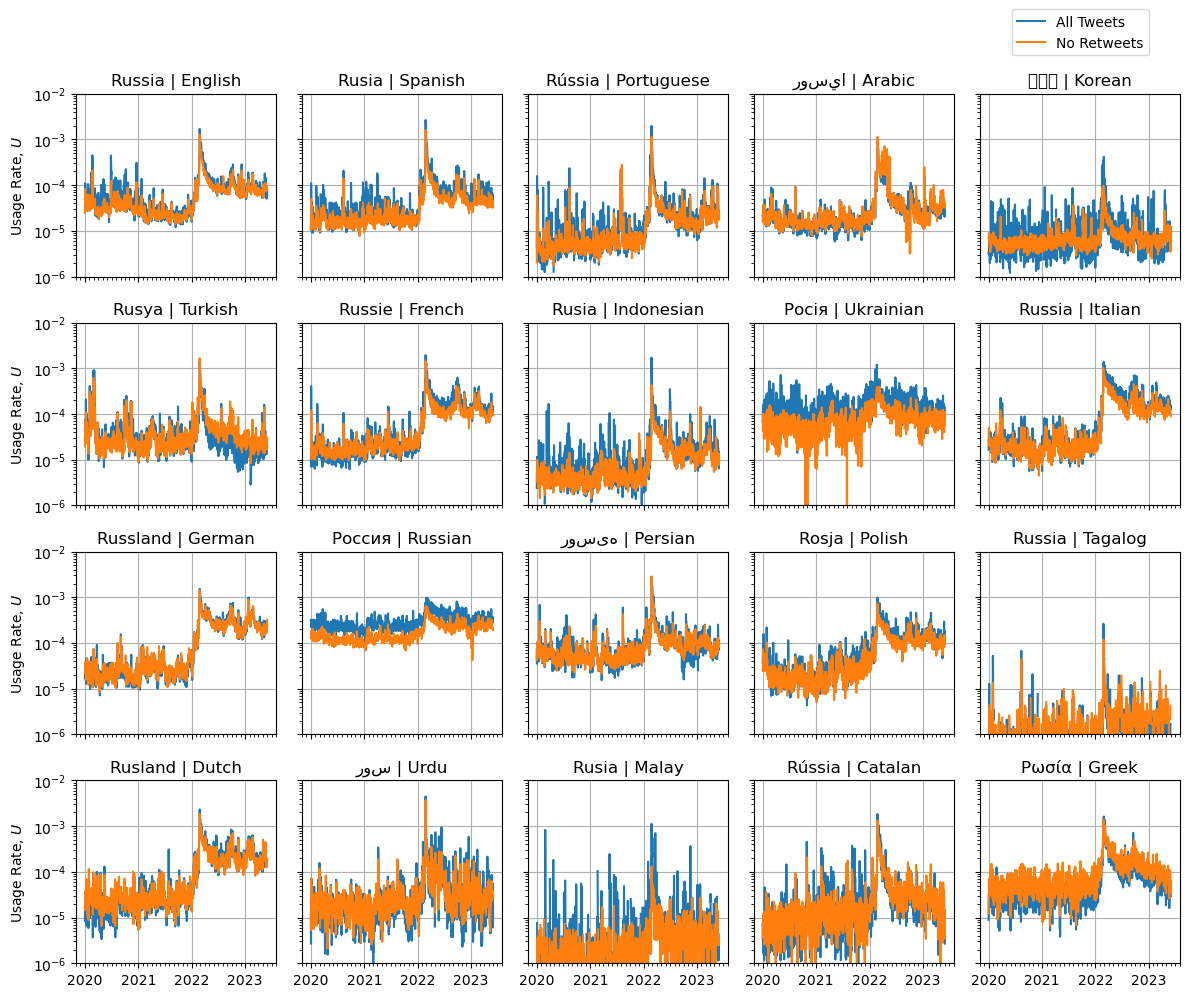

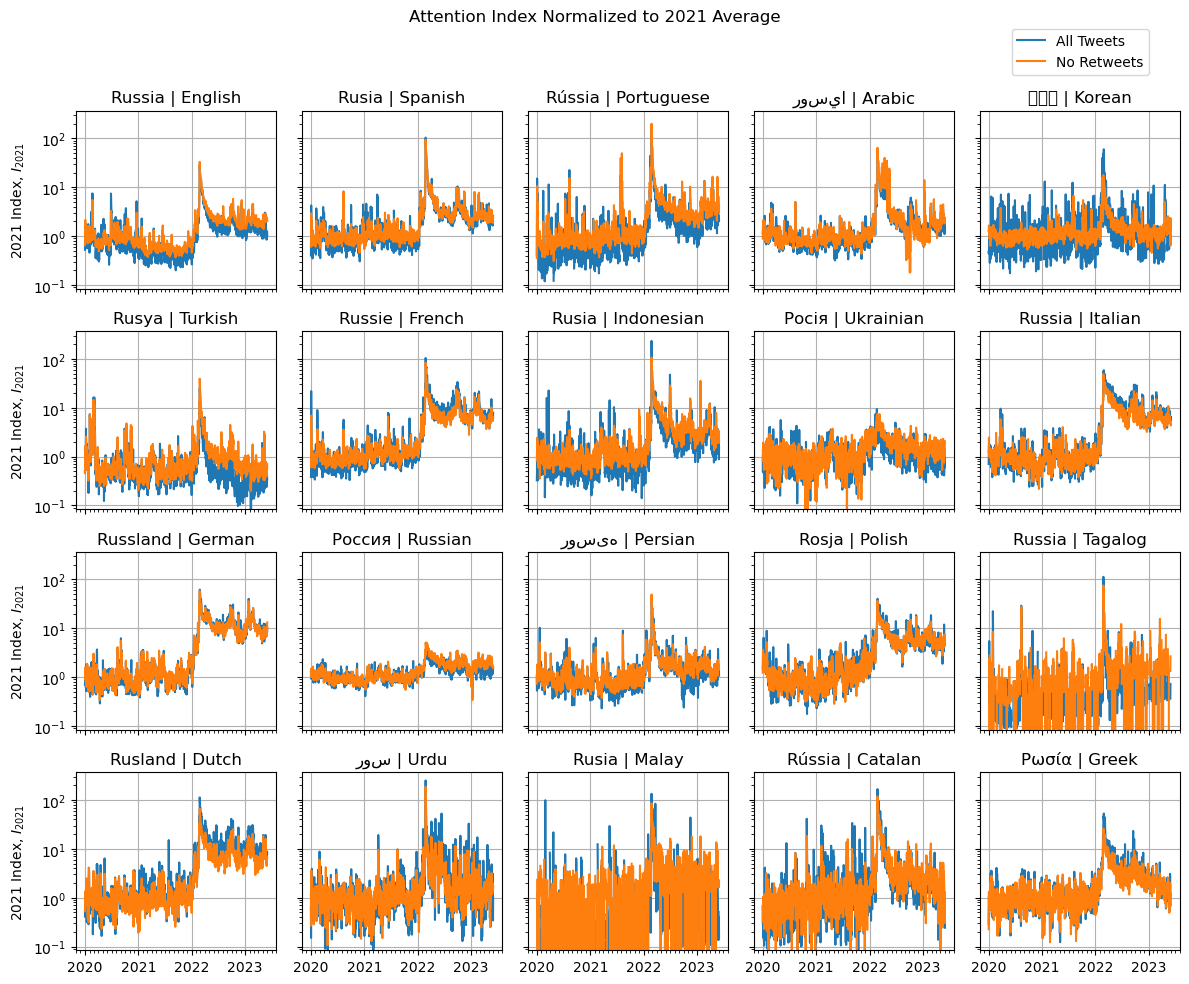

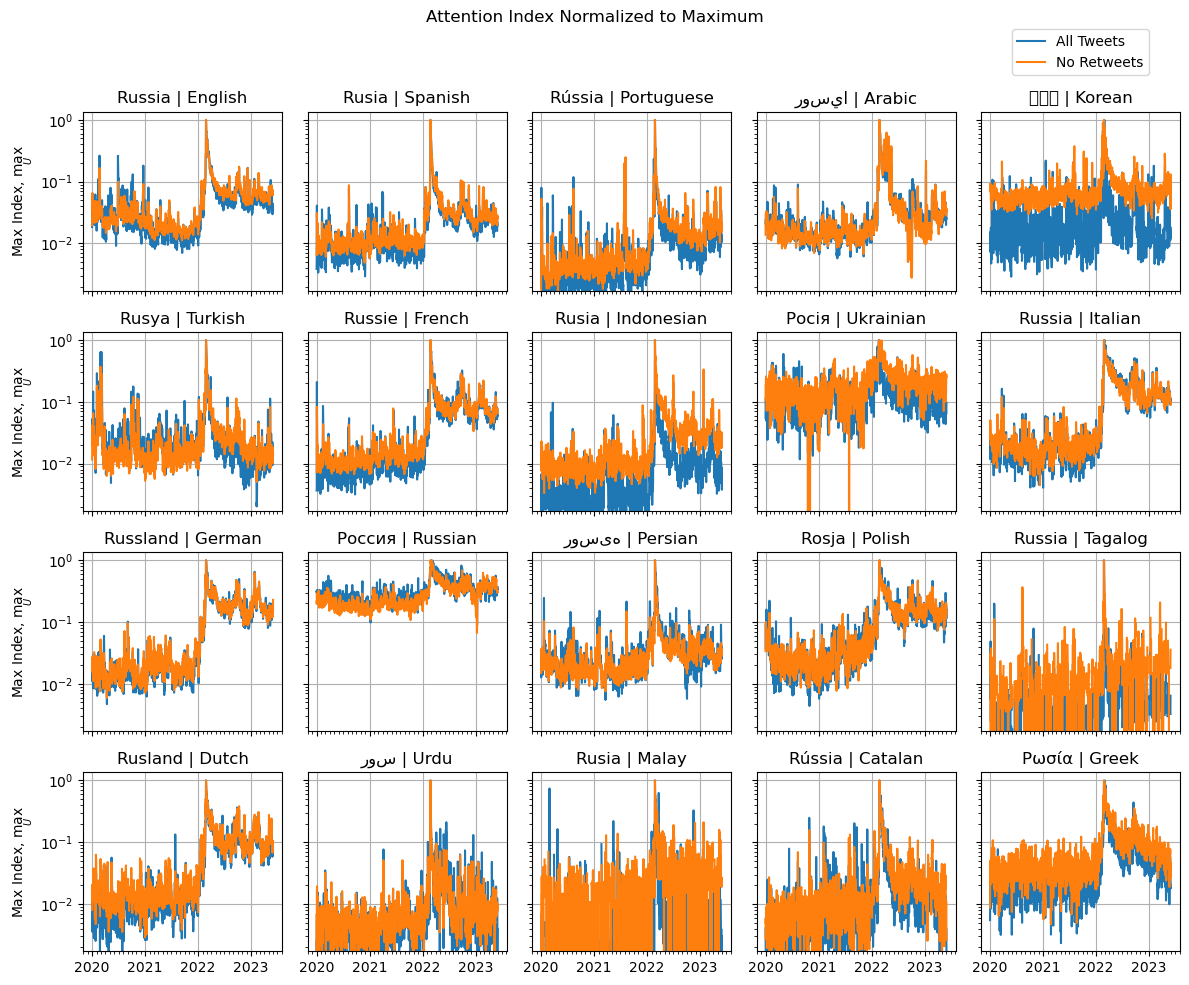

In [9]:
for plot_type in ['freq', '2021_index', 'max_index']:
    plot_compare_languages(ngrams_array, langs, anchor, plot_type)

In [150]:
def to_matrix(df):
    """Take a multiIndex dataframe and return a numpy matrix"""
    x = ngrams_array['freq'].values.reshape(20,len(ngrams_array)//20)
    return x

In [204]:
x = ngrams_array['freq_no_rt'].values.reshape(20,len(ngrams_array)//20)

In [212]:
print(x.shape)
y = np.zeros(x.shape)
for i in range(y.shape[0]):
    y[i,:]= np.convolve(np.nan_to_num(x[i,:]), np.ones(7), 'same') / 7
print(y.shape)

(20, 616)
(20, 616)


In [213]:
cov = np.corrcoef(y)

Text(0.5, 1.0, 'Russia')

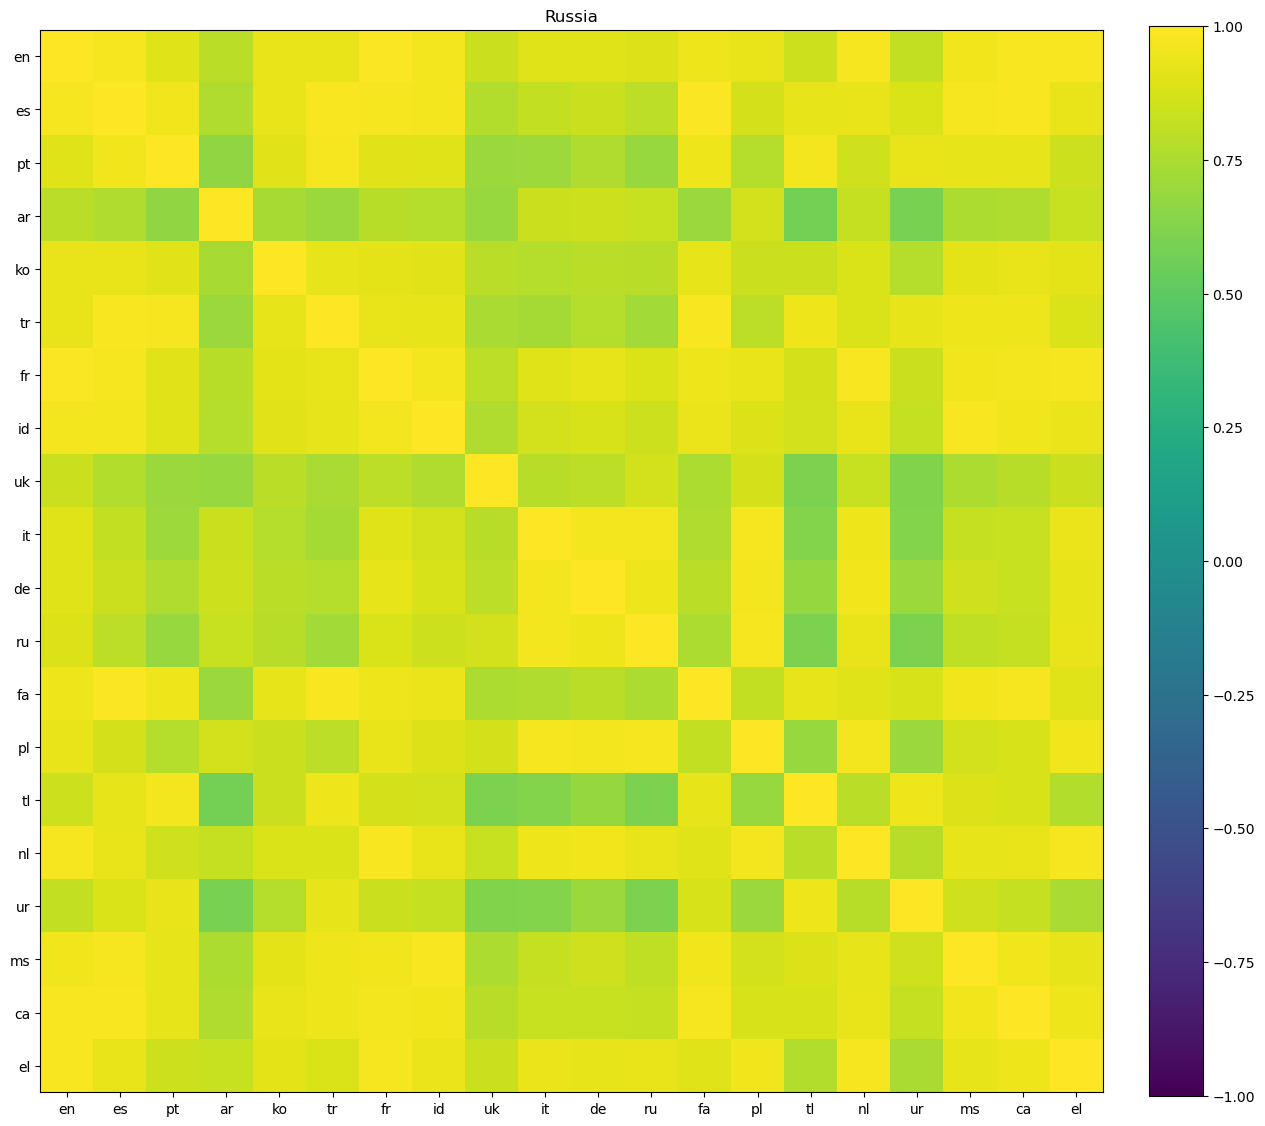

In [217]:
f,ax = plt.subplots(figsize=(15,15))
cbar = ax.imshow(cov)
ax.set_xticks([i for i in range(len(langs))])
ax.set_yticks([i for i in range(len(langs))])
ax.set_xticklabels(langs);
ax.set_yticklabels(langs);
cbar.set_clim(-1,1)
plt.colorbar(cbar,fraction=0.046, pad=0.04)
plt.title(anchor)